In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

/var/folders/cs/jyh0ydnd0r978qyg_lxk0t0h0000gn/T/ipykernel_79966/3861224192.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Gage Height Locations

In [9]:
# read gage location data
gageheight_path = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/USGS_StreamGageData/gage_height_1950-10-01_2024-02-15.csv'

gageheight_data_dir = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/USGS_StreamGageData/GageHeight'

In [10]:
df_gageheight = pd.read_csv(gageheight_path)

df_gageheight.drop(index=0, inplace=True)

df_gageheight = df_gageheight.astype(dtype={'dec_lat_va':np.float32, 'dec_long_va':np.float32, 'alt_va': np.float32})

df_gageheight.drop(columns=['coord_acy_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd', 'basin_cd', 'rt_bol'], inplace=True)

df_gageheight.rename(columns={'dec_lat_va':'lat', 'dec_long_va':'long', 'dec_coord_datum_cd':'datum','alt_va':'altitude'}, inplace=True)

df_gageheight['gh_ind'] = 1

df_gageheight['gh_start'] = pd.NaT

df_gageheight['gh_end'] = pd.NaT

df_gageheight.head(10)

,site_no,station_nm,lat,long,datum,altitude,gh_ind,gh_start,gh_end
1,03207965,"GRAPEVINE CREEK NEAR PHYLLIS, KY",37.432606,-82.353760,NAD83,797.190002,1,NaT,NaT
2,03208000,"LEVISA FORK BELOW FISHTRAP DAM NEAR MILLARD, KY",37.425938,-82.412369,NAD83,599.159973,1,NaT,NaT
3,03209300,"RUSSELL FORK AT ELKHORN CITY, KY",37.303997,-82.342926,NAD83,773.000000,1,NaT,NaT
4,03209310,"ELKHORN LAKE AT JENKINS, KY",37.168354,-82.635063,NAD83,1573.060059,1,NaT,NaT
5,03209325,"ELKHORN CREEK AT BURDINE, KY",37.187832,-82.604568,NAD83,NaN,1,NaT,NaT
6,03209410,"RUSSELL FORK AT CEDARVILLE, KY",37.312954,-82.359558,NAD83,743.400024,1,NaT,NaT
7,03209500,"LEVISA FORK AT PIKEVILLE, KY",37.464268,-82.526260,NAD83,631.260010,1,NaT,NaT
8,03209800,"LEVISA FORK AT PRESTONSBURG, KY",37.670929,-82.777107,NAD83,587.380005,1,NaT,NaT
9,03210000,"JOHNS CREEK NEAR META, KY",37.567043,-82.457924,NAD83,714.520020,1,NaT,NaT
10,03211500,"JOHNS CREEK NEAR VAN LEAR, KY",37.743706,-82.724045,NAD83,596.609985,1,NaT,NaT


In [11]:
for csv in glob.glob(f"{gageheight_data_dir}/*.csv"):

    df_temp = pd.read_csv(csv, low_memory=False)
    gage = df_temp.iloc[1,1]
    start_date = pd.to_datetime(df_temp.iloc[1,2], errors='coerce')
    end_date = pd.to_datetime(df_temp.iloc[-1,2], errors='coerce')

    df_gageheight.loc[df_gageheight['site_no'] == gage, 'gh_start'] = start_date

    df_gageheight.loc[df_gageheight['site_no'] == gage, 'gh_end'] = end_date

In [12]:
df_gageheight.sort_values('gh_start', inplace=True)

df_gageheight.reset_index(inplace=True, drop=True)

df_gageheight

,site_no,station_nm,lat,long,datum,altitude,gh_ind,gh_start,gh_end
0,03303300,"MIDDLE FORK ANDERSON RIVER AT BRISTOW, IN",38.138947,-86.721100,NAD83,394.100006,1,2007-10-01 00:00:00,2024-02-15 00:00:00
1,03291780,"INDIAN-KENTUCK CREEK NEAR CANAAN, IN",38.878113,-85.257179,NAD83,588.400024,1,2007-10-01 00:00:00,2024-02-15 00:00:00
2,03294000,"SILVER CREEK NEAR SELLERSBURG, IN",38.370621,-85.726349,NAD83,429.200012,1,2007-10-01 00:00:00,2024-02-15 00:00:00
3,03303000,"BLUE RIVER NEAR WHITE CLOUD, IN",38.237568,-86.228310,NAD83,433.809998,1,2007-10-01 00:00:00,2024-02-15 00:00:00
4,03381700,"OHIO RIVER AT OLD SHAWNEETOWN, IL-KY",37.692501,-88.134720,NAD83,309.100006,1,2007-10-01 00:00:00,2024-02-14 23:00:00
...,...,...,...,...,...,...,...,...,...
246,03312900,"BARREN RIVER LAKE NEAR FINNEY, KY",36.891991,-86.124153,NAD83,500.000000,1,2023-10-18 00:00:00,2024-02-14 23:00:00
247,03280800,"BUCKHORN LAKE AT BUCKHORN, KY",37.340092,-83.470184,NAD83,NaN,1,2023-10-18 00:00:00,2024-02-15 00:00:00
248,03209310,"ELKHORN LAKE AT JENKINS, KY",37.168354,-82.635063,NAD83,1573.060059,1,2023-12-07 13:45:00,2024-02-15 00:00:00
249,03209325,"ELKHORN CREEK AT BURDINE, KY",37.187832,-82.604568,NAD83,NaN,1,2024-01-31 14:45:00,2024-02-15 00:00:00


In [13]:
df_gageheight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   site_no     251 non-null    object        
 1   station_nm  251 non-null    object        
 2   lat         251 non-null    float32       
 3   long        251 non-null    float32       
 4   datum       251 non-null    object        
 5   altitude    232 non-null    float32       
 6   gh_ind      251 non-null    int64         
 7   gh_start    251 non-null    datetime64[ns]
 8   gh_end      251 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float32(3), int64(1), object(3)
memory usage: 14.8+ KB


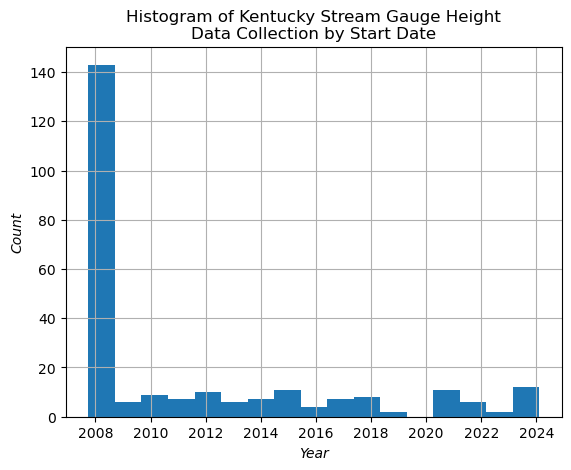

In [19]:
bins = df_gageheight['gh_start'].max().year - df_gageheight['gh_start'].min().year

df_gageheight['gh_start'].hist(bins=bins)

plt.title('Histogram of Kentucky Stream Gauge Height\nData Collection by Start Date')
plt.ylabel('Count', style='italic')
plt.xlabel('Year', style='italic')

plt.show()

# Streamflow

In [20]:
streamflow_path = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/USGS_StreamGageData/streamflow_1950-10-01_2024-02-15.csv'

streamflow_data_dir = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/USGS_StreamGageData/Streamflow'

In [21]:
df_streamflow = pd.read_csv(streamflow_path)

df_streamflow.drop(index=0, inplace=True)

df_streamflow = df_streamflow.astype(dtype={'dec_lat_va':np.float32, 'dec_long_va':np.float32, 'alt_va': np.float32})

df_streamflow.drop(columns=['coord_acy_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd', 'basin_cd', 'rt_bol'], inplace=True)

df_streamflow.rename(columns={'dec_lat_va':'lat', 'dec_long_va':'long', 'dec_coord_datum_cd':'datum','alt_va':'altitude'}, inplace=True)

df_streamflow['sf_ind'] = 1

df_streamflow['sf_start'] = pd.NaT

df_streamflow['sf_end'] = pd.NaT

df_streamflow.head(10)

,site_no,station_nm,lat,long,datum,altitude,sf_ind,sf_start,sf_end
1,03207965,"GRAPEVINE CREEK NEAR PHYLLIS, KY",37.432606,-82.353760,NAD83,797.190002,1,NaT,NaT
2,03209410,"RUSSELL FORK AT CEDARVILLE, KY",37.312954,-82.359558,NAD83,743.400024,1,NaT,NaT
3,03209500,"LEVISA FORK AT PIKEVILLE, KY",37.464268,-82.526260,NAD83,631.260010,1,NaT,NaT
4,03209800,"LEVISA FORK AT PRESTONSBURG, KY",37.670929,-82.777107,NAD83,587.380005,1,NaT,NaT
5,03210000,"JOHNS CREEK NEAR META, KY",37.567043,-82.457924,NAD83,714.520020,1,NaT,NaT
6,03212500,"LEVISA FORK AT PAINTSVILLE, KY",37.815372,-82.791550,NAD83,566.179993,1,NaT,NaT
7,03213700,"TUG FORK AT WILLIAMSON, WV",37.673157,-82.280144,NAD83,619.909973,1,NaT,NaT
8,03215410,"BLAINE CREEK NEAR BLAINE, KY",38.029533,-82.846832,NAD83,632.460022,1,NaT,NaT
9,03216070,"OHIO RIVER AT IRONTON, OH",38.532055,-82.685944,NAD83,480.410004,1,NaT,NaT
10,03216500,"LITTLE SANDY RIVER AT GRAYSON, KY",38.330082,-82.939339,NAD83,557.030029,1,NaT,NaT


In [22]:
for csv in glob.glob(f"{streamflow_data_dir}/*.csv"):

    df_temp = pd.read_csv(csv, low_memory=False)
    gage = df_temp.iloc[1,1]
    start_date = pd.to_datetime(df_temp.iloc[1,2], errors='coerce')
    end_date = pd.to_datetime(df_temp.iloc[-1,2], errors='coerce')

    df_streamflow.loc[df_streamflow['site_no'] == gage, 'sf_start'] = start_date

    df_streamflow.loc[df_streamflow['site_no'] == gage, 'sf_end'] = end_date

In [23]:
df_streamflow.sort_values('sf_start', inplace=True)

df_streamflow.reset_index(inplace=True, drop=True)

df_streamflow

,site_no,station_nm,lat,long,datum,altitude,sf_ind,sf_start,sf_end
0,03404000,"CUMBERLAND RIVER AT WILLIAMSBURG, KY",36.743416,-84.156044,NAD83,891.020020,1,1973-03-15 01:00:00,2024-02-16 00:00:00
1,03210000,"JOHNS CREEK NEAR META, KY",37.567043,-82.457924,NAD83,714.520020,1,1974-01-18 00:00:00,2024-02-16 00:00:00
2,03403910,"CLEAR FORK AT SAXTON, KY",36.633972,-84.111595,NAD83,921.429993,1,1975-02-09 00:00:00,2024-02-16 00:00:00
3,03403500,"CUMBERLAND RIVER AT BARBOURVILLE, KY",36.862309,-83.887428,NAD83,942.489990,1,1984-03-17 01:00:00,2005-09-30 23:30:00
4,03410500,"SOUTH FORK CUMBERLAND RIVER NEAR STEARNS, KY",36.627022,-84.533272,NAD83,765.359985,1,1984-03-31 01:00:00,2023-12-09 16:30:00
...,...,...,...,...,...,...,...,...,...
222,03309000,"GREEN RIVER AT MAMMOTH CAVE, KY",37.180050,-86.112473,NAD83,409.350006,1,2017-11-14 14:15:00,2024-02-15 23:00:00
223,03414078,"CROCUS CREEK NEAR AMANDAVILLE, KY",36.887028,-85.330284,NAD83,547.979980,1,2018-04-20 13:30:00,2024-02-15 23:00:00
224,03319600,"ROUGH RIVER AT HARTFORD, KY",37.453102,-86.910828,NAD83,351.570007,1,2018-12-17 13:00:00,2024-02-15 23:00:00
225,03298940,"ROLLING FORK AT HWY 208 AT CALVARY, KY",37.512501,-85.261108,NAD83,605.380005,1,2021-08-19 16:00:00,2024-02-16 00:00:00


In [24]:
df_streamflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   site_no     227 non-null    object        
 1   station_nm  227 non-null    object        
 2   lat         227 non-null    float32       
 3   long        227 non-null    float32       
 4   datum       227 non-null    object        
 5   altitude    192 non-null    float32       
 6   sf_ind      227 non-null    int64         
 7   sf_start    227 non-null    datetime64[ns]
 8   sf_end      227 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float32(3), int64(1), object(3)
memory usage: 13.4+ KB


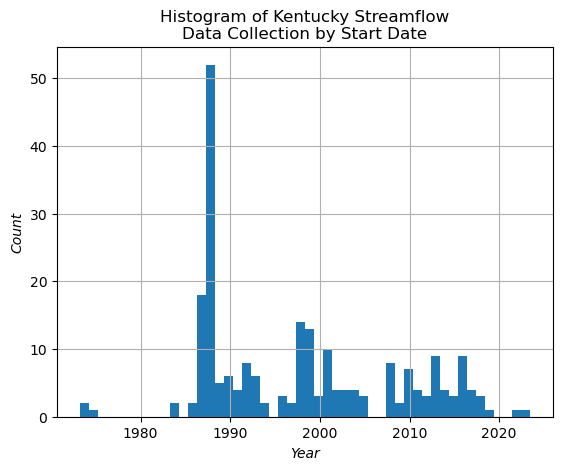

In [25]:
bins = df_streamflow['sf_start'].max().year - df_streamflow['sf_start'].min().year

df_streamflow['sf_start'].hist(bins=bins)

plt.title('Histogram of Kentucky Streamflow\nData Collection by Start Date')
plt.ylabel('Count', style='italic')
plt.xlabel('Year', style='italic')

plt.show()

# Merge Gage Height & Streamflow

In [151]:
df_locations = pd.merge(left=df_gageheight, right=df_streamflow, how='outer', on='site_no', suffixes=['', '_sf'])

df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   site_no        294 non-null    object        
 1   station_nm     251 non-null    object        
 2   lat            251 non-null    float32       
 3   long           251 non-null    float32       
 4   datum          251 non-null    object        
 5   altitude       232 non-null    float32       
 6   gh_ind         251 non-null    float64       
 7   gh_start       251 non-null    datetime64[ns]
 8   gh_end         251 non-null    datetime64[ns]
 9   station_nm_sf  227 non-null    object        
 10  lat_sf         227 non-null    float32       
 11  long_sf        227 non-null    float32       
 12  datum_sf       227 non-null    object        
 13  altitude_sf    192 non-null    float32       
 14  sf_ind         227 non-null    float64       
 15  sf_start       227 non-

In [152]:
df_locations.loc[df_locations['gh_ind']!=1, 'gh_ind'] = 0

df_locations.loc[df_locations['sf_ind']!=1, 'sf_ind'] = 0

df_locations[['gh_ind','sf_ind']] = df_locations[['gh_ind','sf_ind']].astype(np.int32)


nan_indices = df_locations[df_locations['station_nm'].isna()].index.values

df_locations.loc[nan_indices, 'station_nm'] = df_locations.loc[nan_indices, 'station_nm_sf']

df_locations.loc[nan_indices, 'lat'] = df_locations.loc[nan_indices, 'lat_sf']

df_locations.loc[nan_indices, 'long'] = df_locations.loc[nan_indices, 'long_sf']

df_locations.loc[nan_indices, 'datum'] = df_locations.loc[nan_indices, 'datum_sf']

df_locations.loc[nan_indices, 'altitude'] = df_locations.loc[nan_indices, 'altitude_sf']

df_locations.drop(columns=['station_nm_sf', 'lat_sf', 'long_sf', 'datum_sf', 'altitude_sf'], inplace=True)


df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   site_no     294 non-null    object        
 1   station_nm  294 non-null    object        
 2   lat         294 non-null    float32       
 3   long        294 non-null    float32       
 4   datum       294 non-null    object        
 5   altitude    241 non-null    float32       
 6   gh_ind      294 non-null    int32         
 7   gh_start    251 non-null    datetime64[ns]
 8   gh_end      251 non-null    datetime64[ns]
 9   sf_ind      294 non-null    int32         
 10  sf_start    227 non-null    datetime64[ns]
 11  sf_end      227 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float32(3), int32(2), object(3)
memory usage: 21.9+ KB


In [173]:
df_locations.head(10)

,site_no,station_nm,lat,long,datum,altitude,gh_ind,gh_start,gh_end,sf_ind,sf_start,sf_end
0,03207965,"GRAPEVINE CREEK NEAR PHYLLIS, KY",37.432606,-82.353760,NAD83,797.190002,1,2007-10-01 01:00:00,2024-02-15 00:00:00,1,1989-04-25 00:00:00,2024-02-16 00:00:00
1,03208000,"LEVISA FORK BELOW FISHTRAP DAM NEAR MILLARD, KY",37.425938,-82.412369,NAD83,599.159973,1,2008-07-31 11:00:00,2024-02-15 00:00:00,0,NaT,NaT
2,03209300,"RUSSELL FORK AT ELKHORN CITY, KY",37.303997,-82.342926,NAD83,773.000000,1,2008-10-10 10:00:00,2017-10-03 16:30:00,0,NaT,NaT
3,03209310,"ELKHORN LAKE AT JENKINS, KY",37.168354,-82.635063,NAD83,1573.060059,1,2023-12-07 13:45:00,2024-02-15 00:00:00,0,NaT,NaT
4,03209325,"ELKHORN CREEK AT BURDINE, KY",37.187832,-82.604568,NAD83,NaN,1,2024-01-31 14:45:00,2024-02-15 00:00:00,0,NaT,NaT
5,03209410,"RUSSELL FORK AT CEDARVILLE, KY",37.312954,-82.359558,NAD83,743.400024,1,2017-10-04 17:45:00,2024-02-15 00:00:00,1,2017-10-04 17:45:00,2020-10-15 17:45:00
6,03209500,"LEVISA FORK AT PIKEVILLE, KY",37.464268,-82.526260,NAD83,631.260010,1,2007-10-01 01:00:00,2024-02-15 00:00:00,1,2015-10-01 01:00:00,2024-02-16 00:00:00
7,03209800,"LEVISA FORK AT PRESTONSBURG, KY",37.670929,-82.777107,NAD83,587.380005,1,2007-10-01 01:00:00,2024-02-15 00:00:00,1,2023-06-28 00:00:00,2024-02-16 00:00:00
8,03210000,"JOHNS CREEK NEAR META, KY",37.567043,-82.457924,NAD83,714.520020,1,2007-10-01 01:00:00,2024-02-15 00:00:00,1,1974-01-18 00:00:00,2024-02-16 00:00:00
9,03211500,"JOHNS CREEK NEAR VAN LEAR, KY",37.743706,-82.724045,NAD83,596.609985,1,2008-07-15 08:00:00,2024-02-15 00:00:00,0,NaT,NaT


In [174]:
save_dir = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/USGS_StreamGageData'

save_path = os.path.join(save_dir, 'KentuckyStreamGaugeLocations.csv')

df_locations.to_csv(save_path)

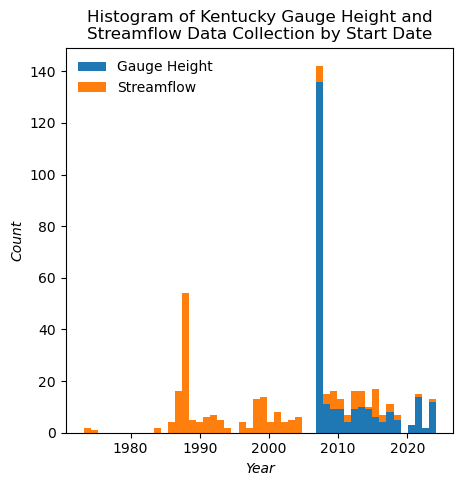

In [172]:
fig, ax = plt.subplots(figsize=(5,5))

bins = df_streamflow['sf_start'].max().year - df_streamflow['sf_start'].min().year

ax.hist(df_locations[['gh_start','sf_start']], 
        bins=bins, histtype='barstacked', 
        label=['Gauge Height','Streamflow'])

plt.legend(frameon=False)
plt.title('Histogram of Kentucky Gauge Height and\nStreamflow Data Collection by Start Date')
plt.xlabel('Year', style='italic')
plt.ylabel('Count', style='italic')

plt.show()